# Visualizing Classical Music Influence with `networkx`

## 0. Introduction

## 1. Scraping the data

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
import codecs
import json
import urllib

from requests import get
from bs4 import BeautifulSoup
import networkx as nx

In [3]:
pages = [
    'https://en.wikipedia.org/wiki/List_of_music_students_by_teacher:_A_to_B',
    'https://en.wikipedia.org/wiki/List_of_music_students_by_teacher:_C_to_F',
    'https://en.wikipedia.org/wiki/List_of_music_students_by_teacher:_G_to_J',
    'https://en.wikipedia.org/wiki/List_of_music_students_by_teacher:_K_to_M',
    'https://en.wikipedia.org/wiki/List_of_music_students_by_teacher:_N_to_Q',
    'https://en.wikipedia.org/wiki/List_of_music_students_by_teacher:_R_to_S',
    'https://en.wikipedia.org/wiki/List_of_music_students_by_teacher:_T_to_Z'
]

In [4]:
adjlist = ''

for url in pages:
    response = get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    for heading in soup.find_all('h3'):
        if not heading.find('a'):
            continue
        url = heading.find('a')['href']
        if '/wiki/' not in url:
            continue
        teacher_name = url.split('/wiki/')[1].split('_(')[0].split('#')[0]

        student_entries = heading.find_next_sibling("div", class_="columns").find_all('li')
        student_names = []
        for student in student_entries:
            if not student.find('a'):
                continue

            url = student.find('a')['href']
            if '/wiki/' in url:
                student_names.append(url.split('/wiki/')[1].split('_(')[0].split('#')[0])

        adjlist += '{} {}\n'.format(teacher_name, ' '.join(student_names))

In [5]:
adjlist[:1000]

'Arkady_Abaza Nikolai_Roslavets\nChristian_Ferdinand_Abel Carl_Friedrich_Abel\nHermann_Abendroth Allard_de_Ridder Herbert_Eimert G%C3%BCnther_Herbig Wilhelm_Sch%C3%BCchter William_Steinberg\nDieter_Acker Susanne_Erding-Swiridoff\nAdolphe_Adam L%C3%A9o_Delibes Ferdinand_Poise Lo%C3%AFsa_Puget\nLouis_Adam Joseph_Daussoigne-M%C3%A9hul Ferdinand_H%C3%A9rold Friedrich_Kalkbrenner Henry_Lemoine\nJohn_Luther_Adams Corey_Dargel\nMurray_Adaskin Andrew_Dawes Boyd_McDonald Paul_Pedersen Rodney_Sharman Timothy_Williams\nGuido_Adler Karel_Navr%C3%A1til Anton_Webern Egon_Wellesz\nOskar_Adler Hans_Keller J%C3%B3zef_Koffler Dragan_Plamenac Arnold_Schoenberg\nSamuel_Adler Martin_Amlin Claude_Baker Roger_Briggs Jason_Robert_Brown David_Crumb Greg_Danner Eric_Ewazen Peng-Peng_Gong Jay_Greenberg Anthony_Iannaccone Kamran_Ince Michael_Isaacson Scott_Lindroth Marc_Mellits Carter_Pann Robert_Paterson Paul_Phillips Paul_Reller Michael_Alec_Rose Daria_Semegen Gordon_Stout Christopher_Theofanidis Michael_Sidney

In [6]:
adjlist = urllib.unquote(adjlist).decode('utf-8')

In [7]:
print adjlist

Arkady_Abaza Nikolai_Roslavets
Christian_Ferdinand_Abel Carl_Friedrich_Abel
Hermann_Abendroth Allard_de_Ridder Herbert_Eimert Günther_Herbig Wilhelm_Schüchter William_Steinberg
Dieter_Acker Susanne_Erding-Swiridoff
Adolphe_Adam Léo_Delibes Ferdinand_Poise Loïsa_Puget
Louis_Adam Joseph_Daussoigne-Méhul Ferdinand_Hérold Friedrich_Kalkbrenner Henry_Lemoine
John_Luther_Adams Corey_Dargel
Murray_Adaskin Andrew_Dawes Boyd_McDonald Paul_Pedersen Rodney_Sharman Timothy_Williams
Guido_Adler Karel_Navrátil Anton_Webern Egon_Wellesz
Oskar_Adler Hans_Keller Józef_Koffler Dragan_Plamenac Arnold_Schoenberg
Samuel_Adler Martin_Amlin Claude_Baker Roger_Briggs Jason_Robert_Brown David_Crumb Greg_Danner Eric_Ewazen Peng-Peng_Gong Jay_Greenberg Anthony_Iannaccone Kamran_Ince Michael_Isaacson Scott_Lindroth Marc_Mellits Carter_Pann Robert_Paterson Paul_Phillips Paul_Reller Michael_Alec_Rose Daria_Semegen Gordon_Stout Christopher_Theofanidis Michael_Sidney_Timpson Fisher_Tull Dan_Welcher Michael_Glenn_Will

In [8]:
with codecs.open("adjlist.txt", "w", "utf-8") as temp:
    temp.write(adjlist)

In [9]:
G = nx.read_adjlist('adjlist.txt', create_using=nx.DiGraph())

In [10]:
# nx.draw_networkx(G)

In [11]:
nodes = [{'id': unicode(i)} for i in G.nodes()]
links = [{'source': u[0], 'target': u[1]} for u in G.edges()]
with codecs.open("graph.json", "w", "utf-8") as file:
    json.dump({'nodes': nodes, 'links': links}, file, indent=4)

In [12]:
nodes = [{'data': {'id': unicode(i)}} for i in G.nodes()]
links = [{'data': {'source': u[0], 'target': u[1]}} for u in G.edges()]
with codecs.open("cytoscape.json", "w", "utf-8") as file:
    json.dump(nodes + links, file, indent=2)

## 2. Who are the most influential teachers?

In [13]:
c = nx.katz_centrality(G.reverse(), alpha=0.1)
c

{u'Douglas_Gamley': 0.010669816976345536,
 u'Sergio_Tiempo': 0.010669816976345536,
 u'Harrison_Kerr': 0.010669816976345536,
 u'Bernard_Rands': 0.029021902175659857,
 u'Louis_Gruenberg': 0.010669816976345536,
 u'Russell_Sherman': 0.010669816976345536,
 u'Wilhelm_Middelschulte': 0.012803780371614643,
 u'Georg_Caspar_Wecker': 0.01333727122043192,
 u'Ania_Dorfmann': 0.010669816976345536,
 u'Waldemar_von_Bau\xdfnern': 0.010669816976345536,
 u'Leon_Fleisher': 0.010669816976345536,
 u'Geraldine_Mucha': 0.010669816976345536,
 u'Diana_McIntosh': 0.010669816976345536,
 u'Julia_Ettie_Crane': 0.010669816976345536,
 u'Beniamino_Cesi': 0.016431518143572126,
 u'Irwin_Bazelon': 0.010669816976345536,
 u'Dorothy_Parke': 0.012803780371614643,
 u'Robert_Russell_Bennett': 0.010669816976345536,
 u'Lam_Bun-Ching': 0.010669816976345536,
 u'Adolf_Busch': 0.01216359135303391,
 u'Nathan_Michel': 0.010669816976345536,
 u'Alan_Kogosowski': 0.010669816976345536,
 u'Th\xe9odore_Lack': 0.010669816976345536,
 u'Maud_A

In [14]:
for teacher in sorted(c, key=c.get)[::-1][:100]:
    print teacher, c[teacher]

Nadia_Boulanger 0.274495883432
Darius_Milhaud 0.134000097443
Karlheinz_Stockhausen 0.11210776697
Olivier_Messiaen 0.108117255421
Roger_Sessions 0.092463993728
André_Gedalge 0.082188846773
Vincent_d'Indy 0.0676640069978
Arnold_Schoenberg 0.0671215139177
Paul_Hindemith 0.0660813774796
Charles-Marie_Widor 0.0585532248399
Gabriel_Fauré 0.0568063391444
Franz_Liszt 0.0564763469927
Aaron_Copland 0.0560776771771
Antoine_François_Marmontel 0.054224628083
Louis_Vierne 0.0539462649351
Louis_Andriessen 0.0533490848817
Charles_Villiers_Stanford 0.0533288122295
Milton_Babbitt 0.0531826357369
Ferruccio_Busoni 0.052340576662
Salomon_Jadassohn 0.0500337160314
Noël_Gallon 0.0485796766933
Isidor_Philipp 0.0481056487345
Howard_Hanson 0.0479643483483
Carl_Reinecke 0.0468060116777
John_Weinzweig 0.0464137038471
Theodor_Leschetizky 0.0460075593979
Walter_Piston 0.045538778855
Bernard_Rogers 0.0454982335505
Jacob_Druckman 0.0449199294704
Otto_Luening 0.0443384244452
Maria_Curcio 0.043746249603
Mathilde_Marche

In [15]:
nx.shortest_path(G, 'Ludwig_van_Beethoven', 'Heinrich_Neuhaus')

['Ludwig_van_Beethoven',
 u'Carl_Czerny',
 u'Franz_Liszt',
 u'Carl_Reinecke',
 u'Aleksander_Micha\u0142owski',
 'Heinrich_Neuhaus']

In [16]:
most_important_teachers = sorted(c, key=c.get)[::-1][:100]

In [17]:
important_teachers_graph = nx.subgraph(G, most_important_teachers)

## 3. Let's visualize it!

In [18]:
# https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3/29597209
def hierarchy_pos(G, root, levels=None, width=1., height=1.):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node
       levels: a dictionary
               key: level number (starting from 0)
               value: number of nodes in this level
       width: horizontal space allocated for drawing
       height: vertical space allocated for drawing'''
    TOTAL = "total"
    CURRENT = "current"
    def make_levels(levels, node=root, currentLevel=0, parent=None):
        """Compute the number of nodes for each level
        """
        if not currentLevel in levels:
            levels[currentLevel] = {TOTAL : 0, CURRENT : 0}
        levels[currentLevel][TOTAL] += 1
        try:
            neighbors = G.neighbors(node)
            for neighbor in neighbors:
                if not neighbor == parent:
                    levels =  make_levels(levels, neighbor, currentLevel + 1, node)
        except:
            pass
        return levels

    def make_pos(pos, node=root, currentLevel=0, parent=None, vert_loc=0):
        dx = 1.0/levels[currentLevel][TOTAL]
        left = dx/2
        pos[node] = ((left + dx*levels[currentLevel][CURRENT])*width, vert_loc)
        levels[currentLevel][CURRENT] += 1
        try:
            neighbors = G.neighbors(node)
            for neighbor in neighbors:
                if not neighbor == parent:
                    pos = make_pos(pos, neighbor, currentLevel + 1, node, vert_loc-vert_gap)
        except:
            pass
        return pos
    
    if levels is None:
        levels = make_levels({})
    else:
        levels = {l:{TOTAL: levels[l], CURRENT:0} for l in levels}
    vert_gap = height / (max([l for l in levels])+1)
    return make_pos({})

In [19]:
def pretty_node(node):
    return u'{}. {}'.format(node[0], node.split('_I')[0].split('_')[-1])

def draw_hierarchical_graph(graph, root=None):
    plt.figure(figsize=(10, 10))

    root = root or nx.topological_sort(graph).next()
    pos = hierarchy_pos(graph, root)
    reduced_graph = nx.subgraph(graph, pos.keys())
    
    relabeled_graph = nx.relabel_nodes(reduced_graph, pretty_node)
    relabeled_pos = {pretty_node(node): p for node, p in pos.items()}
    nx.draw(relabeled_graph, pos=relabeled_pos, with_labels=True, node_size=500, node_color='w', font_size=9, arrowsize=8)

<IPython.core.display.Javascript object>


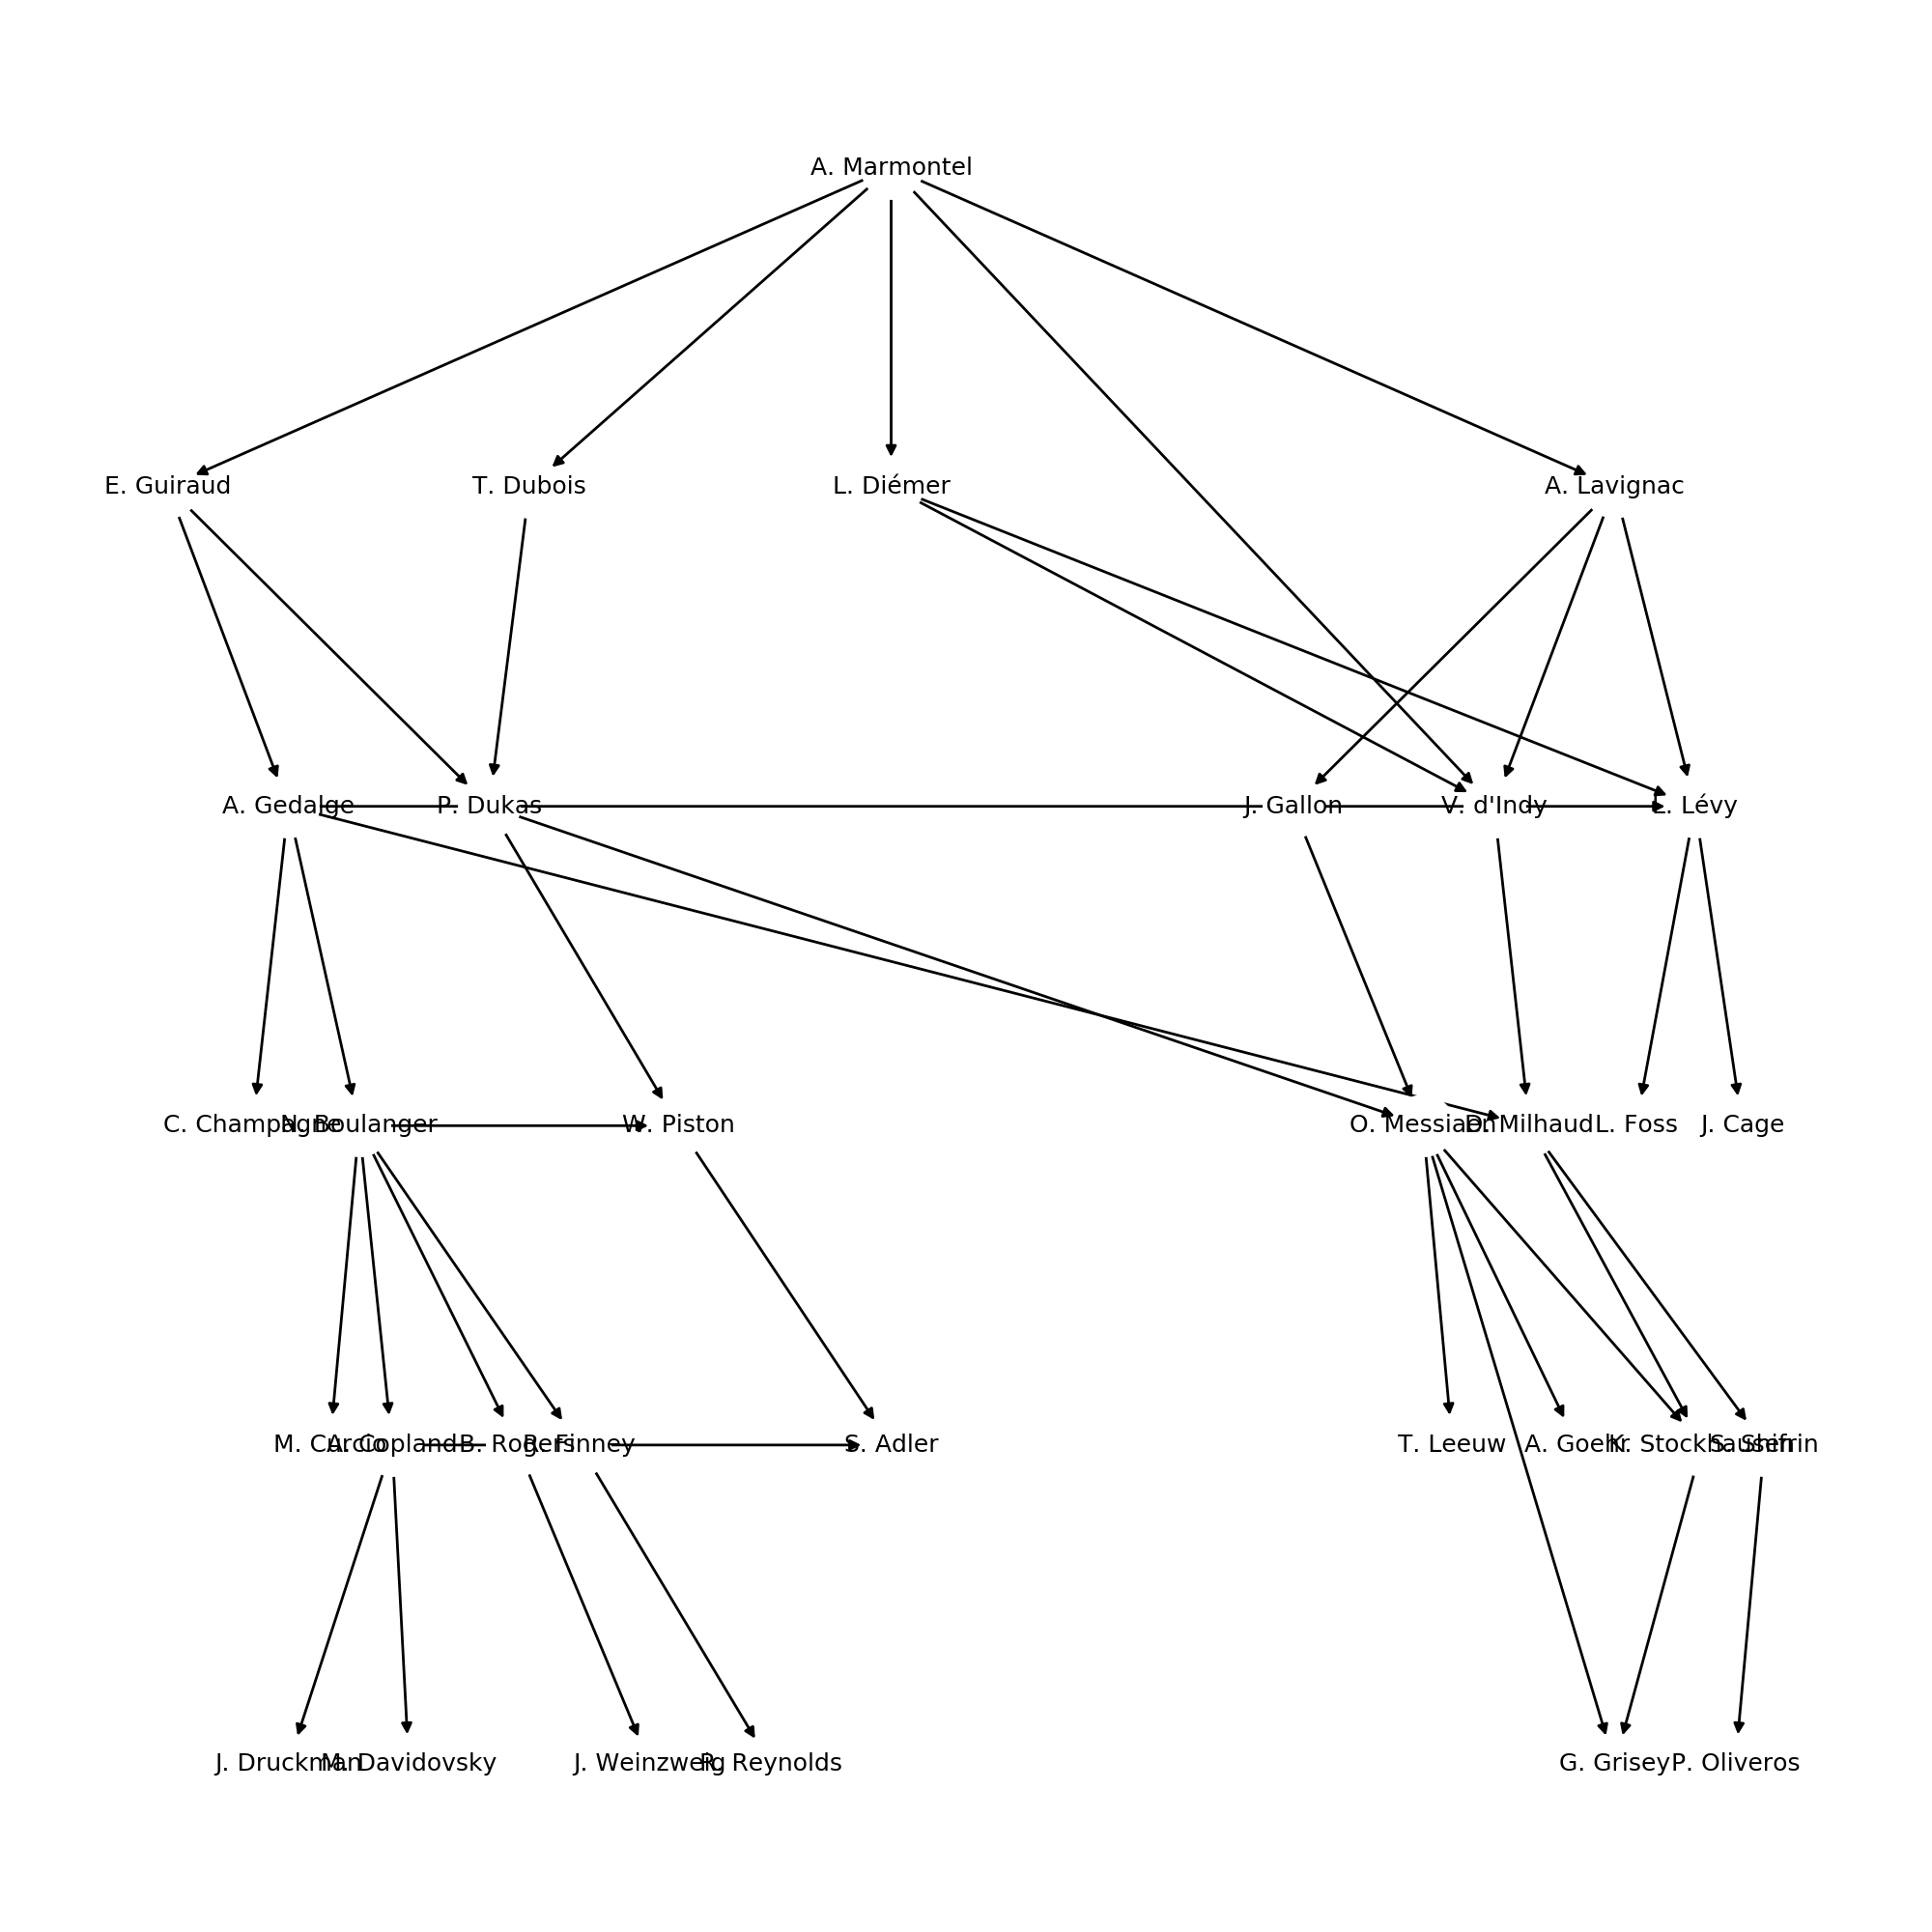

In [20]:
draw_hierarchical_graph(important_teachers_graph)

## 4. The missing links

In [21]:
most_important_teachers_students = set([n for t in most_important_teachers for n in G.successors(t)])

In [22]:
def has_important_students(teacher):
    students = [s for s in G.successors(teacher)]
    return any([student in most_important_teachers for student in students])

most_important_teachers_and_important_students = \
    set(most_important_teachers) | set([p for p in most_important_teachers_students if has_important_students(p)])           

In [23]:
print len(most_important_teachers)
print len(most_important_teachers_and_important_students)
print len(most_important_teachers_students)
print G.number_of_nodes()

100
132
1903
4925


In [24]:
most_important_teachers_and_important_students

{u'Aaron_Copland',
 u'Alban_Berg',
 u'Albert_Lavignac',
 u'Aleksander_Micha\u0142owski',
 u'Alexander_Goehr',
 u'Andr\xe9_Gedalge',
 u'Anna_Yesipova',
 u'Antoine_Fran\xe7ois_Marmontel',
 u'Anton_Reicha',
 u'Antonio_Salieri',
 u'Arnold_Schoenberg',
 u'Artur_Schnabel',
 u'Bernard_Rogers',
 u'Boris_Blacher',
 u'B\xe9la_Bart\xf3k',
 u'Carl_Czerny',
 u'Carl_Reinecke',
 u'Charles-Marie_Widor',
 u'Charles_Koechlin',
 u'Charles_Villiers_Stanford',
 u'Charles_Wood',
 u'Claude_Champagne',
 u'C\xe9sar_Franck',
 u'Darius_Milhaud',
 u'Dorothy_DeLay',
 u'Edward_Burlingame_Hill',
 u'Egon_Petri',
 u'Engelbert_Humperdinck',
 u'Ernest_Bloch',
 u'Ernest_Guiraud',
 u'Ernst_Krenek',
 u'Eusebius_Mandyczewski',
 u'Ferruccio_Busoni',
 u'Franco_Donatoni',
 u'Franz_Lachner',
 u'Franz_Liszt',
 u'Fran\xe7ois-Joseph_F\xe9tis',
 u'Friedrich_Kiel',
 u'Fritz_Reiner',
 u'Fr\xe9d\xe9ric_Chopin',
 u'Gabriel_Faur\xe9',
 u'George_Rochberg',
 u'Georges_Mathias',
 u'Gian_Carlo_Menotti',
 u'Goffredo_Petrassi',
 u'G\xe9rard_G

In [25]:
teacher_and_student_subgraph = nx.subgraph(G, most_important_teachers_and_important_students)

In [26]:
try:
    print [x for x in nx.topological_sort(teacher_and_student_subgraph)]
except Exception:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-26-280518520b52>", line 2, in <module>
    print [x for x in nx.topological_sort(teacher_and_student_subgraph)]
  File "/Users/alex/src/music-graph/env/lib/python2.7/site-packages/networkx/algorithms/dag.py", line 208, in topological_sort
    raise nx.NetworkXUnfeasible("Graph contains a cycle or graph changed "
NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration


In [27]:
for cycle in nx.simple_cycles(teacher_and_student_subgraph):
    print cycle

[u'Claude_Champagne', u'Orpha-F._Deveaux']
[u'Simon_Sechter', u'Henri_Vieuxtemps']


In [28]:
most_important_teachers_and_important_students.remove(u'Orpha-F._Deveaux')
most_important_teachers_and_important_students.remove(u'Henri_Vieuxtemps')

In [29]:
teacher_and_student_subgraph = nx.subgraph(G, most_important_teachers_and_important_students)

<IPython.core.display.Javascript object>


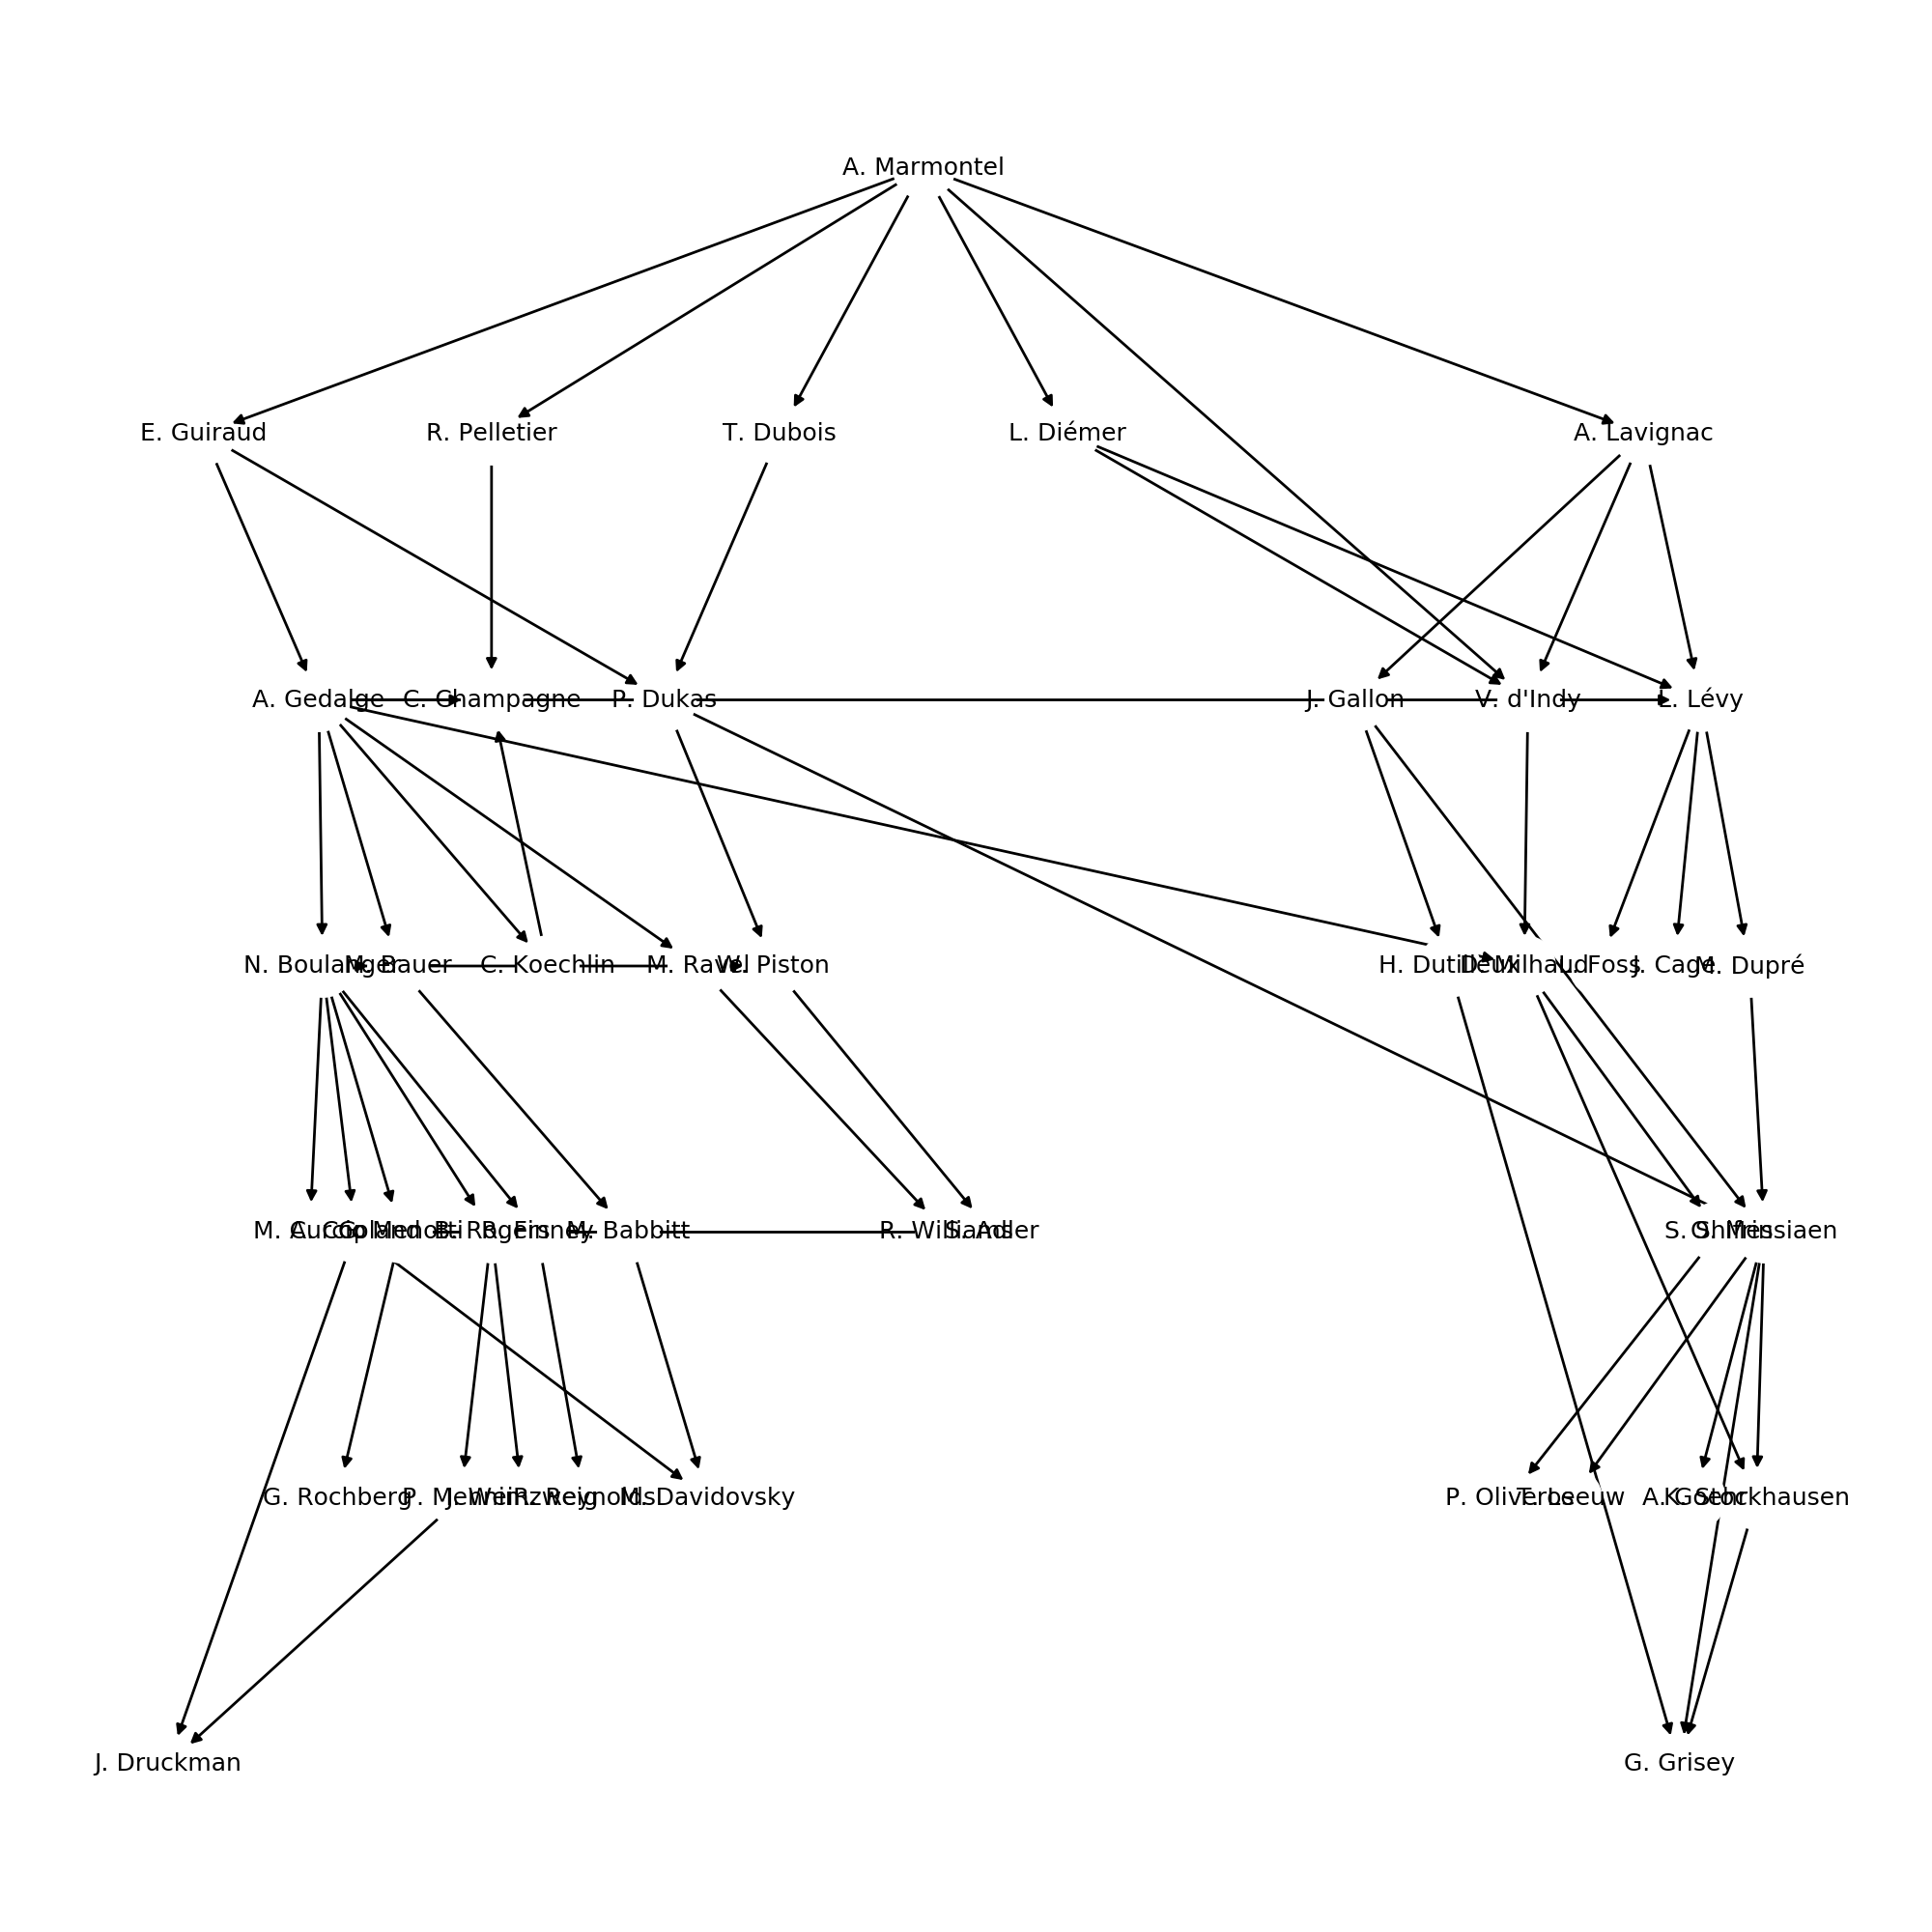

In [30]:
draw_hierarchical_graph(teacher_and_student_subgraph)

## 5. The Beethoven tree

<IPython.core.display.Javascript object>


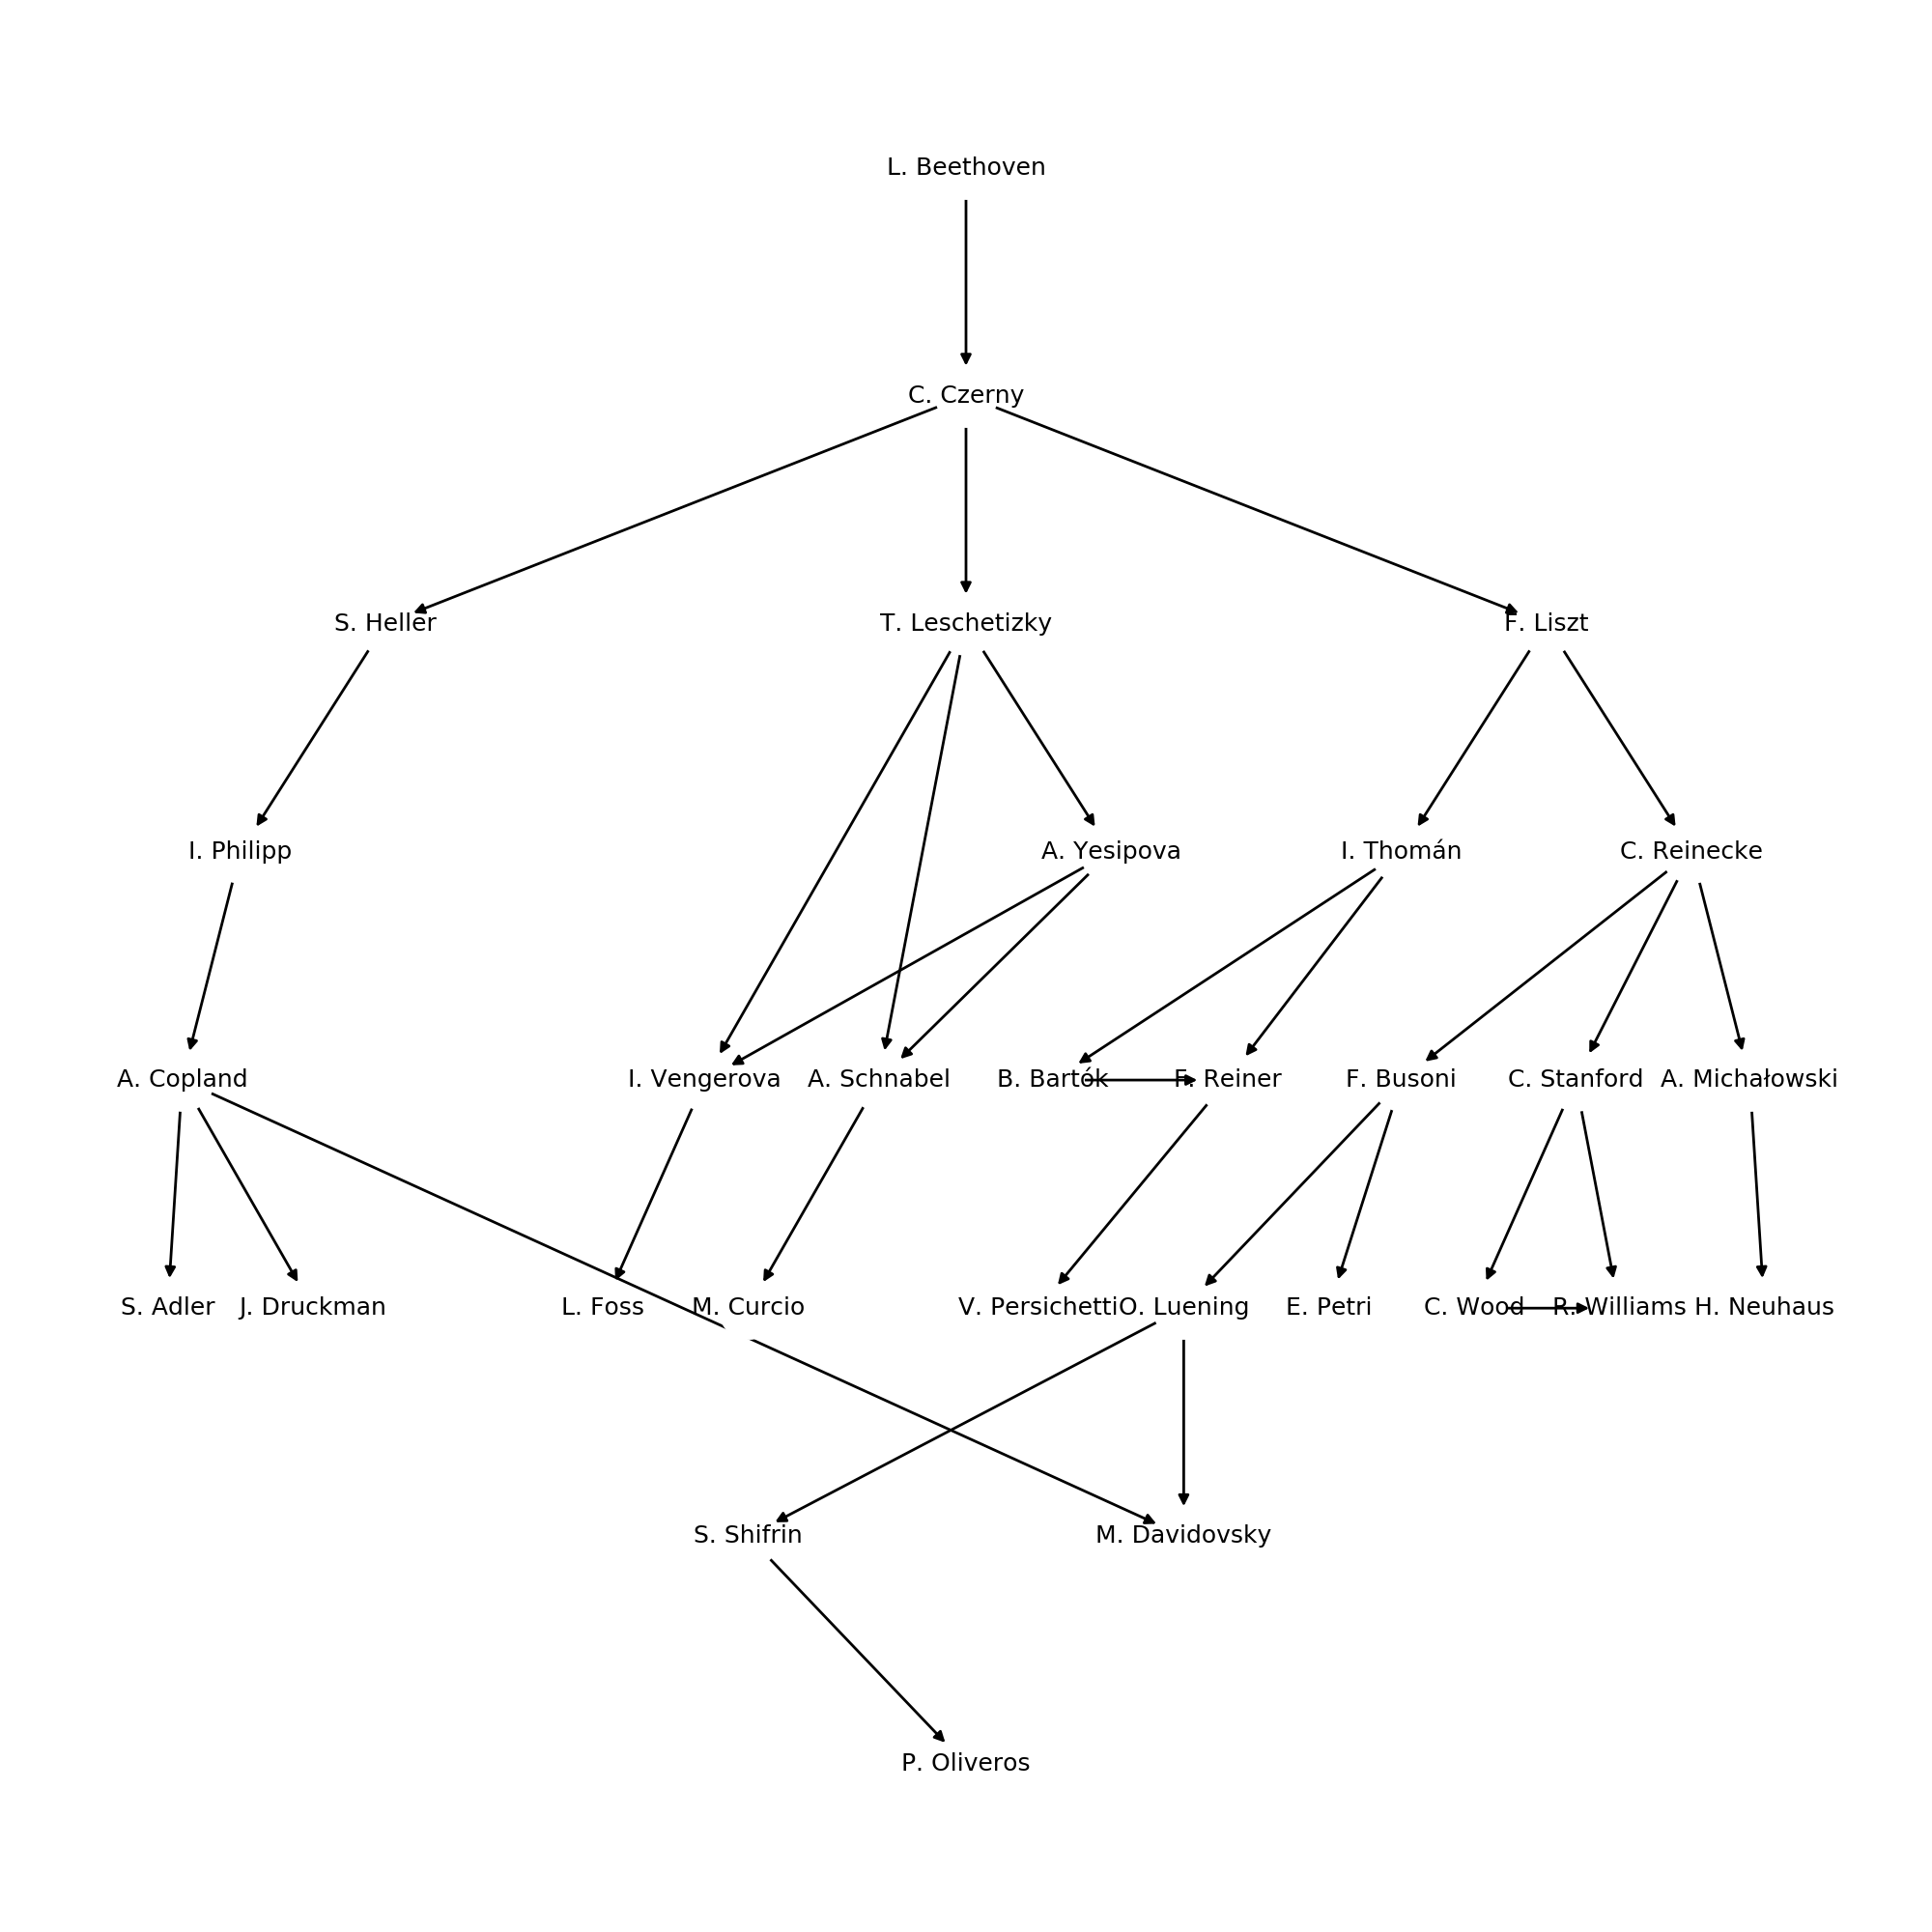

In [31]:
draw_hierarchical_graph(teacher_and_student_subgraph, 'Ludwig_van_Beethoven')

## 6. Before Beethoven

In [32]:
[x for x in teacher_and_student_subgraph.predecessors('Ludwig_van_Beethoven')]

[u'Antonio_Salieri', u'Johann_Georg_Albrechtsberger']

<IPython.core.display.Javascript object>


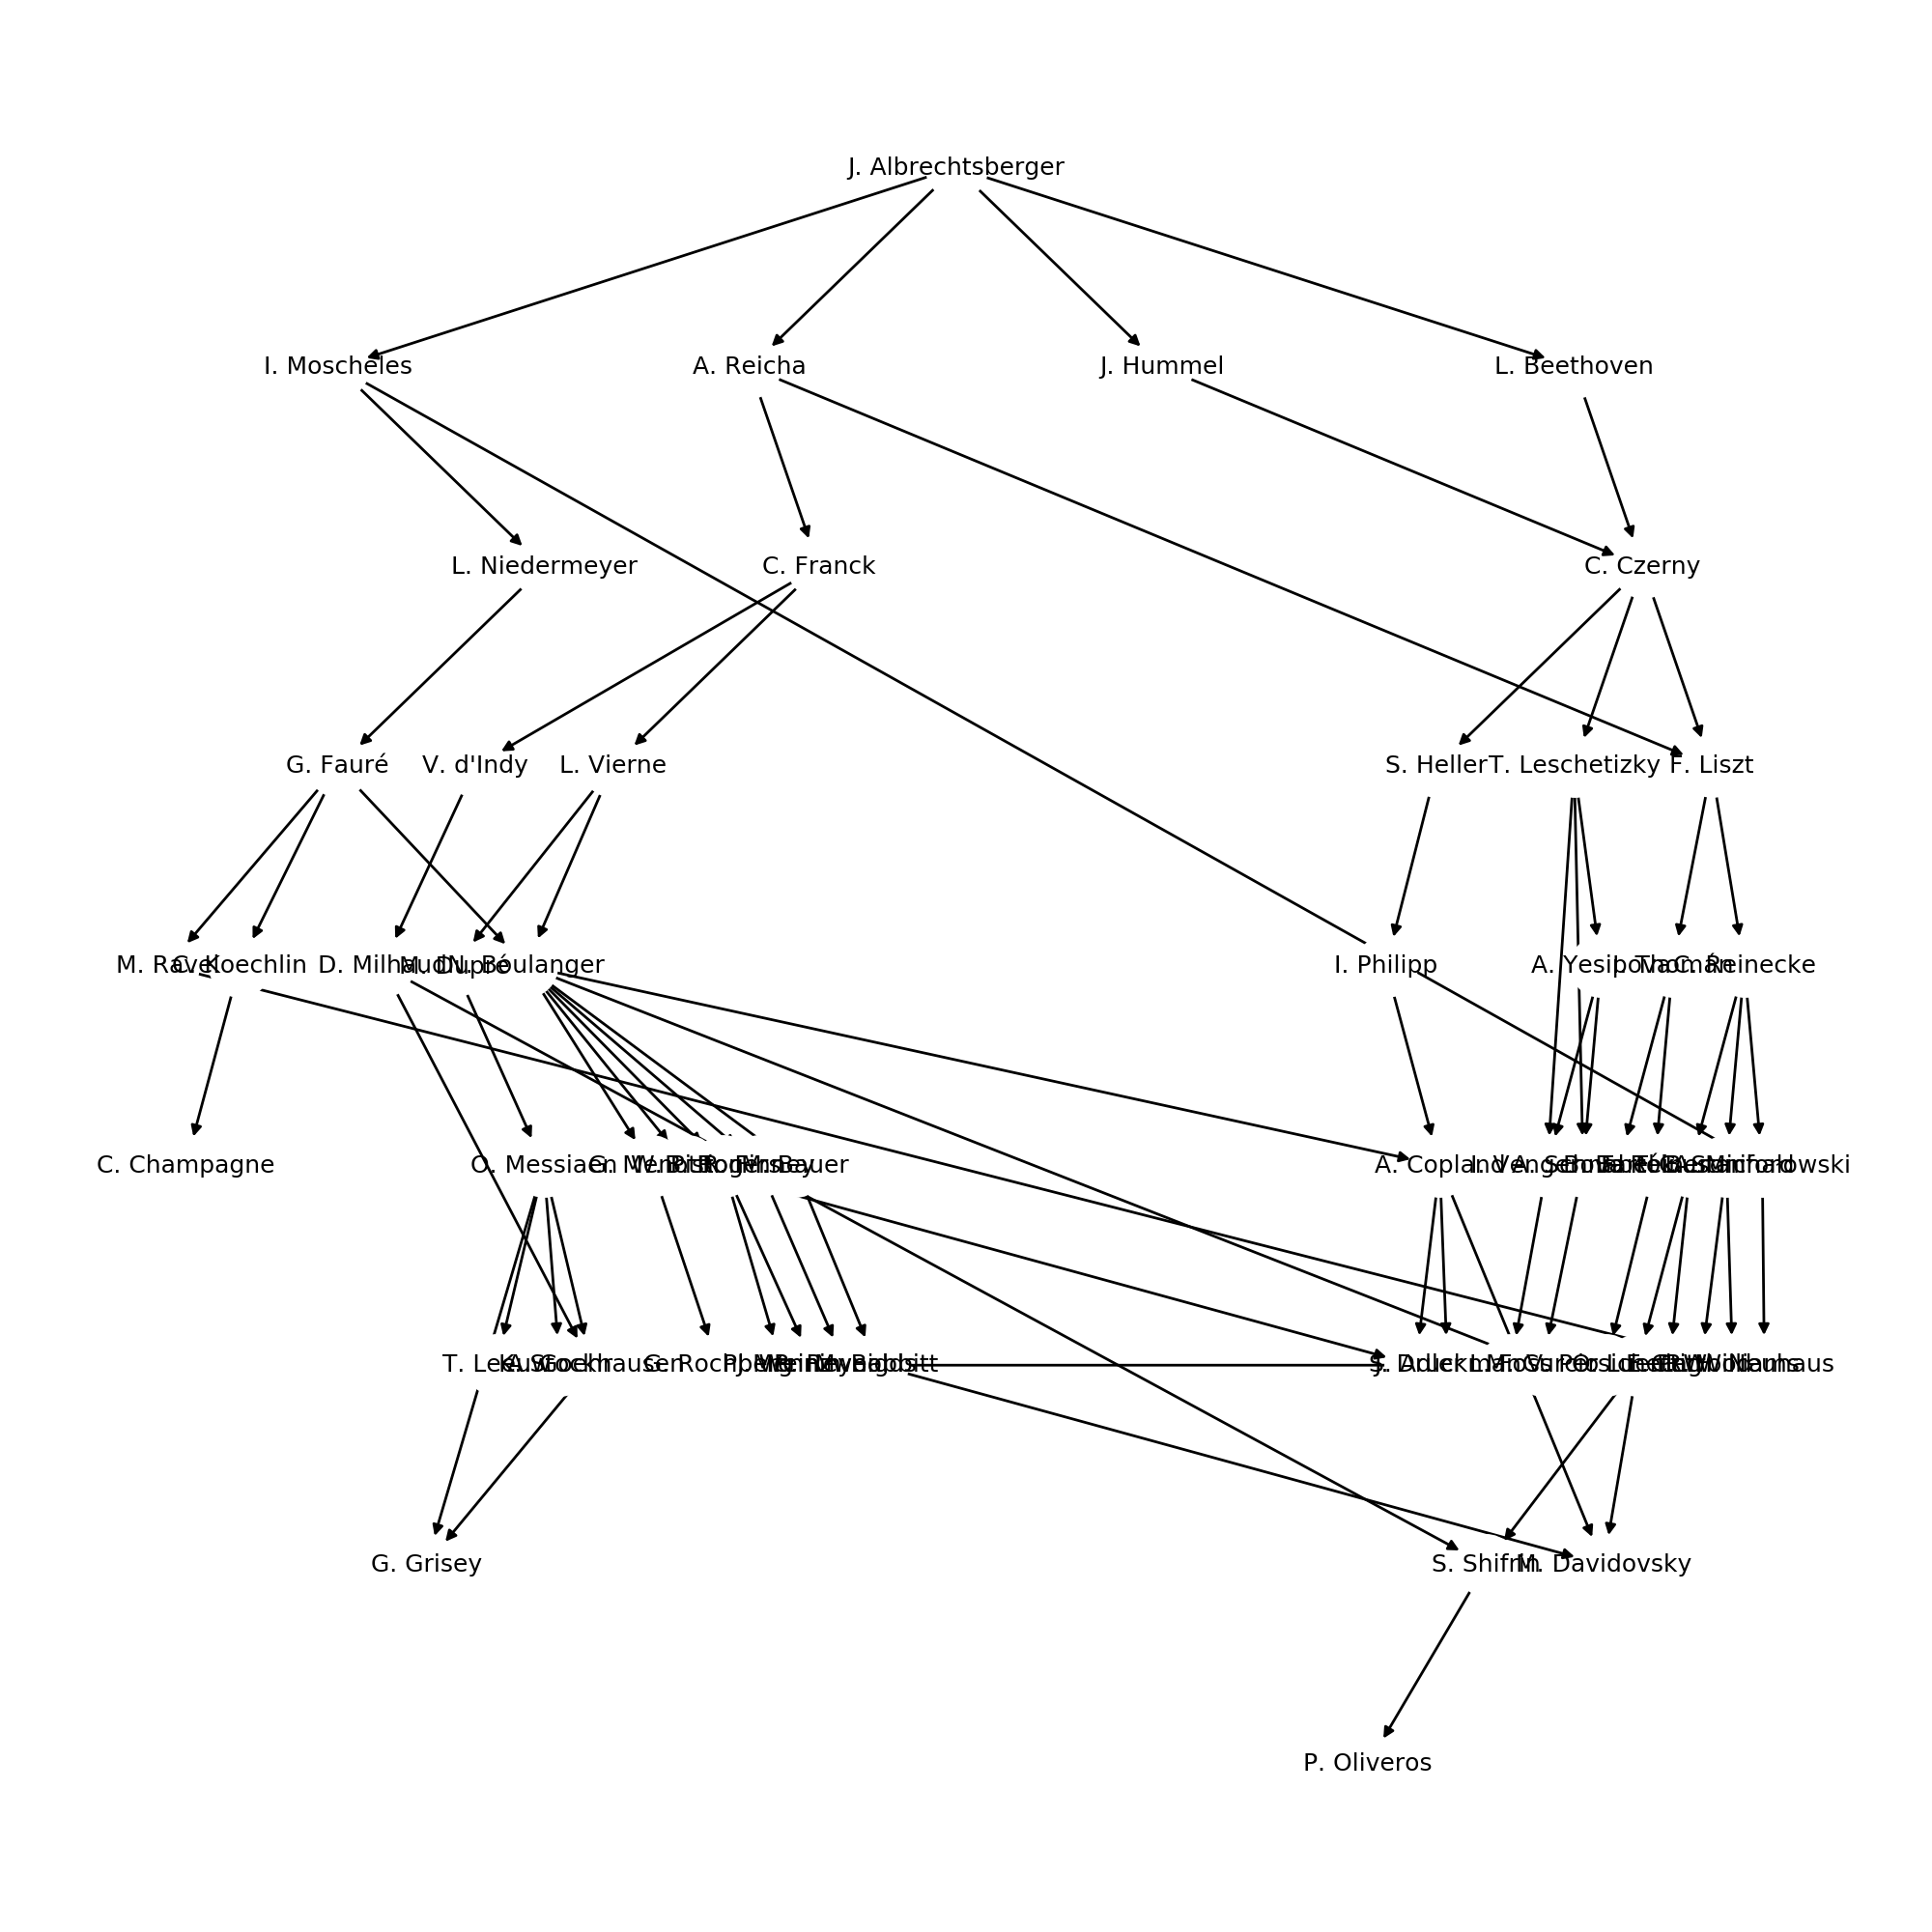

In [33]:
draw_hierarchical_graph(teacher_and_student_subgraph, u'Johann_Georg_Albrechtsberger')

In [34]:
nodes = [{'data': {'id': unicode(i), 'weight': c[i] * 1000}} for i in teacher_and_student_subgraph.nodes()]
links = [{'data': {'source': u[0], 'target': u[1]}} for u in teacher_and_student_subgraph.edges()]
with codecs.open("cytoscape_subgraph.json", "w", "utf-8") as file:
    json.dump(nodes + links, file, indent=2)

<IPython.core.display.Javascript object>


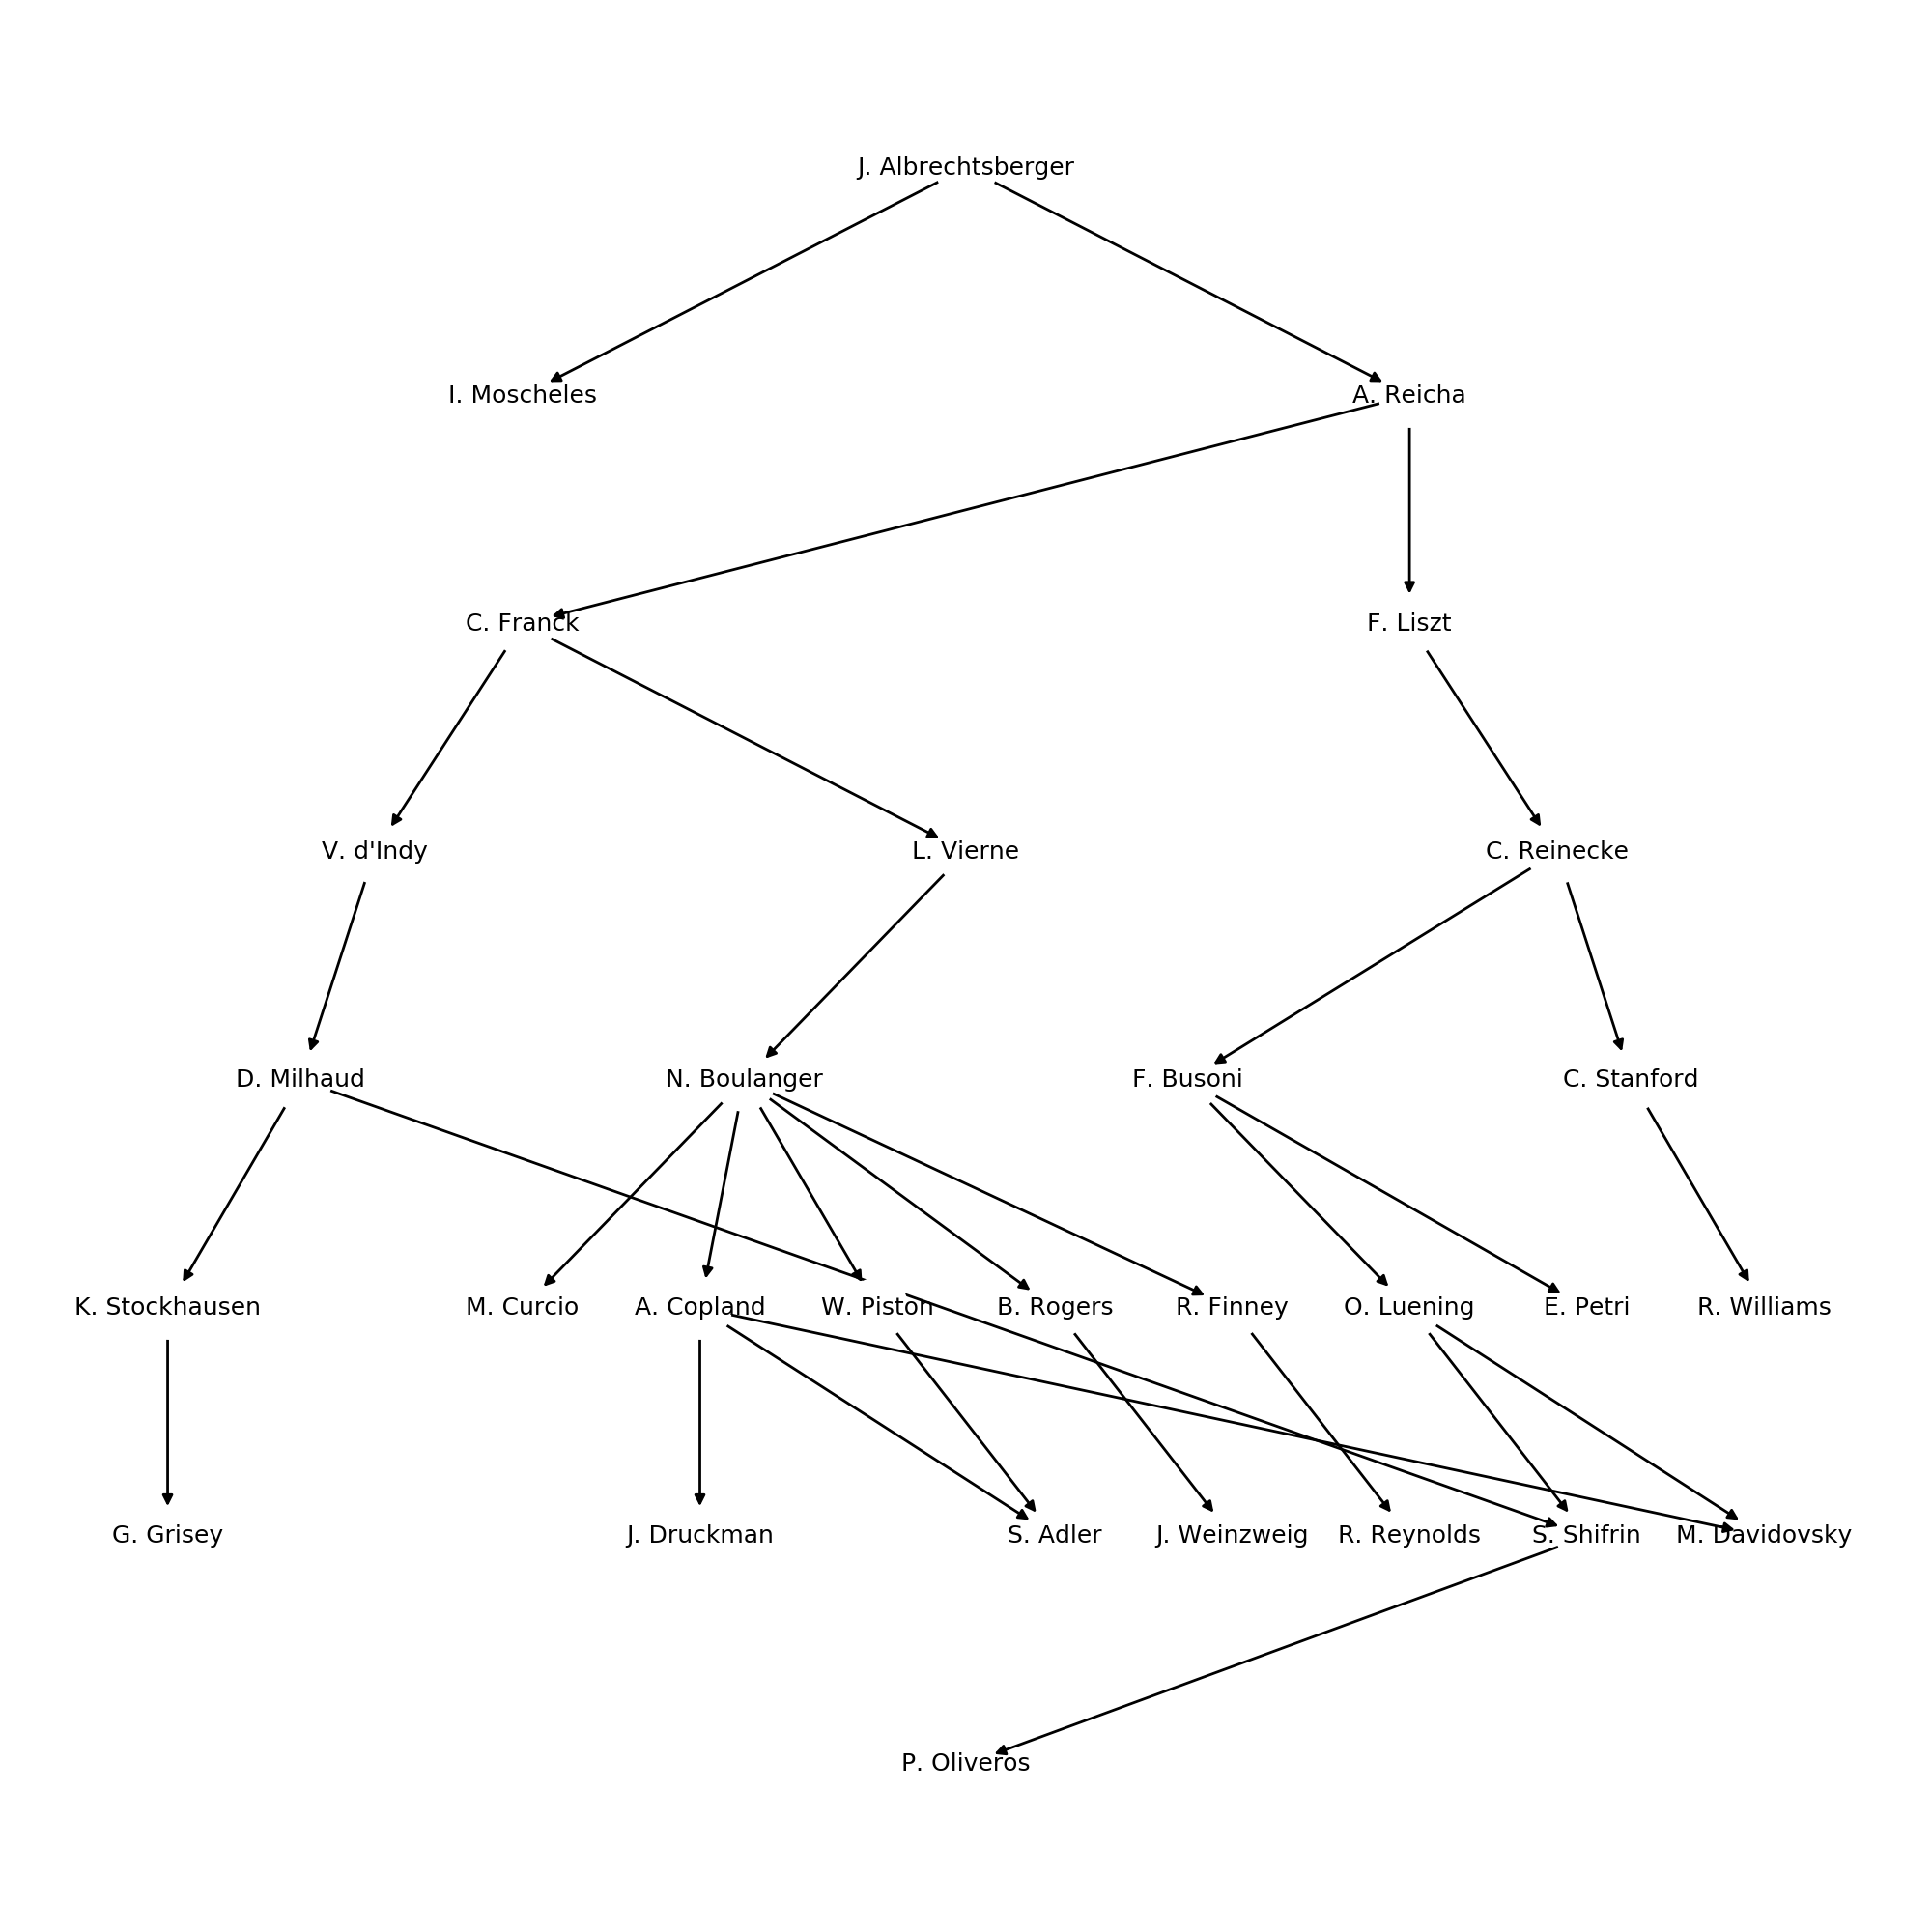

In [35]:
draw_hierarchical_graph(important_teachers_graph, u'Johann_Georg_Albrechtsberger')

In [36]:
for n in nx.shortest_path(G, 'Johann_Sebastian_Bach', 'Heinrich_Neuhaus'):
    print u'{} [{:.4f}]'.format(n.replace('_', ' '), c[n])

Johann Sebastian Bach [0.0405]
Gottfried August Homilius [0.0169]
Johann Adam Hiller [0.0154]
Christian Gottlob Neefe [0.0124]
Ludwig van Beethoven [0.0173]
Carl Czerny [0.0340]
Franz Liszt [0.0565]
Carl Reinecke [0.0468]
Aleksander Michałowski [0.0241]
Heinrich Neuhaus [0.0322]


## 7. What's the longest path?

In [37]:
try:
    print nx.dag_longest_path(G)
except Exception:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-37-6841b85393b0>", line 2, in <module>
    nx.dag_longest_path(G)
  File "<decorator-gen-376>", line 2, in dag_longest_path
  File "/Users/alex/src/music-graph/env/lib/python2.7/site-packages/networkx/utils/decorators.py", line 82, in _not_implemented_for
    return not_implement_for_func(*args, **kwargs)
  File "/Users/alex/src/music-graph/env/lib/python2.7/site-packages/networkx/algorithms/dag.py", line 653, in dag_longest_path
    for v in nx.topological_sort(G):
  File "/Users/alex/src/music-graph/env/lib/python2.7/site-packages/networkx/algorithms/dag.py", line 208, in topological_sort
    raise nx.NetworkXUnfeasible("Graph contains a cycle or graph changed "
NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration


In [38]:
for cycle in nx.simple_cycles(G):
    print cycle

[u'Simon_Sechter', u'Henri_Vieuxtemps']
[u'Wladimir_Vogel', u'Erik_Bergman', u'Heinz_Tiessen']
[u'Wladimir_Vogel', u'Erik_Bergman']
[u'Claude_Champagne', u'Orpha-F._Deveaux']
[u'\u0218tefan_Niculescu', u'Mihail_Jora']


In [39]:
G_without_cycles = nx.subgraph(G, [n for n in G.nodes if n not in [u'Henri_Vieuxtemps', u'Erik_Bergman', u'Orpha-F._Deveaux', u'Mihail_Jora']])

In [40]:
for cycle in nx.simple_cycles(G_without_cycles):
    print cycle

In [41]:
for n in nx.dag_longest_path(G_without_cycles):
    print u'{} [{:.4f}]'.format(n.replace('_', ' '), c[n])

Orlande de Lassus [0.0147]
Andrea Gabrieli [0.0143]
Giovanni Gabrieli [0.0154]
Heinrich Schütz [0.0371]
Johann Schelle [0.0153]
Johann David Heinichen [0.0121]
Johann Georg Pisendel [0.0139]
Franz Benda [0.0193]
Johann Wilhelm Hertel [0.0120]
Carl Friedrich Christian Fasch [0.0137]
Carl Friedrich Zelter [0.0189]
Carl Friedrich Rungenhagen [0.0197]
Franz Wüllner [0.0225]
Hans von Koessler [0.0244]
Ernő Dohnányi [0.0285]
Béla Bartók [0.0330]
Fritz Reiner [0.0169]
Vincent Persichetti [0.0337]
Paavo Heininen [0.0172]
Jouni Kaipainen [0.0117]
Tomi Räisänen [0.0107]


## 8. The whole network

In [42]:
for comp in nx.weakly_connected_components(teacher_and_student_subgraph):
    print comp

set([u'Ernst_Krenek', u'Ton_de_Leeuw', u'George_Rochberg', u'Engelbert_Humperdinck', u'Louis_Vierne', u'Paul_Pisk', u'B\xe9la_Bart\xf3k', u'Heinrich_Neuhaus', u'Ralph_Vaughan_Williams', u'Henri_Dutilleux', u'Charles_Wood', u'Karlheinz_Stockhausen', u'Simon_Sechter', u'Th\xe9odore_Dubois', u'Roger_Sessions', u'Roger_Reynolds', u'Charles_Koechlin', u'Franz_Liszt', u'Otto_Luening', u'Alban_Berg', u'Mario_Davidovsky', u'Howard_Hanson', u'Maria_Curcio', u'Gabriel_Faur\xe9', u'Edward_Burlingame_Hill', u'Friedrich_Kiel', u'John_Cage', u'Isabelle_Vengerova', u'Paul_Dukas', u'Maurice_Ravel', u'Ludwig_van_Beethoven', u'Horatio_Parker', u'Aaron_Copland', u'Gian_Carlo_Menotti', u'Lazare_L\xe9vy', u'Peter_Mennin', u'Seymour_Shifrin', u'G\xe9rard_Grisey', u'Alexander_Goehr', u'Nadia_Boulanger', u'Robert_Erickson', u'No\xebl_Gallon', u'Ludwig_Thuille', u'Jacques-Nicolas_Lemmens', u'Paul_Hindemith', u'Moritz_Hauptmann', u'Isidor_Philipp', u'Samuel_Adler', u'Carl_Czerny', u'Hans_von_Koessler', u'Randal

In [43]:
connected_comp = nx.weakly_connected_components(teacher_and_student_subgraph).next()
connected_teacher_and_student_subgraph = nx.subgraph(teacher_and_student_subgraph, connected_comp)
connected_teacher_and_student_subgraph = nx.relabel_nodes(connected_teacher_and_student_subgraph, pretty_node)

<IPython.core.display.Javascript object>


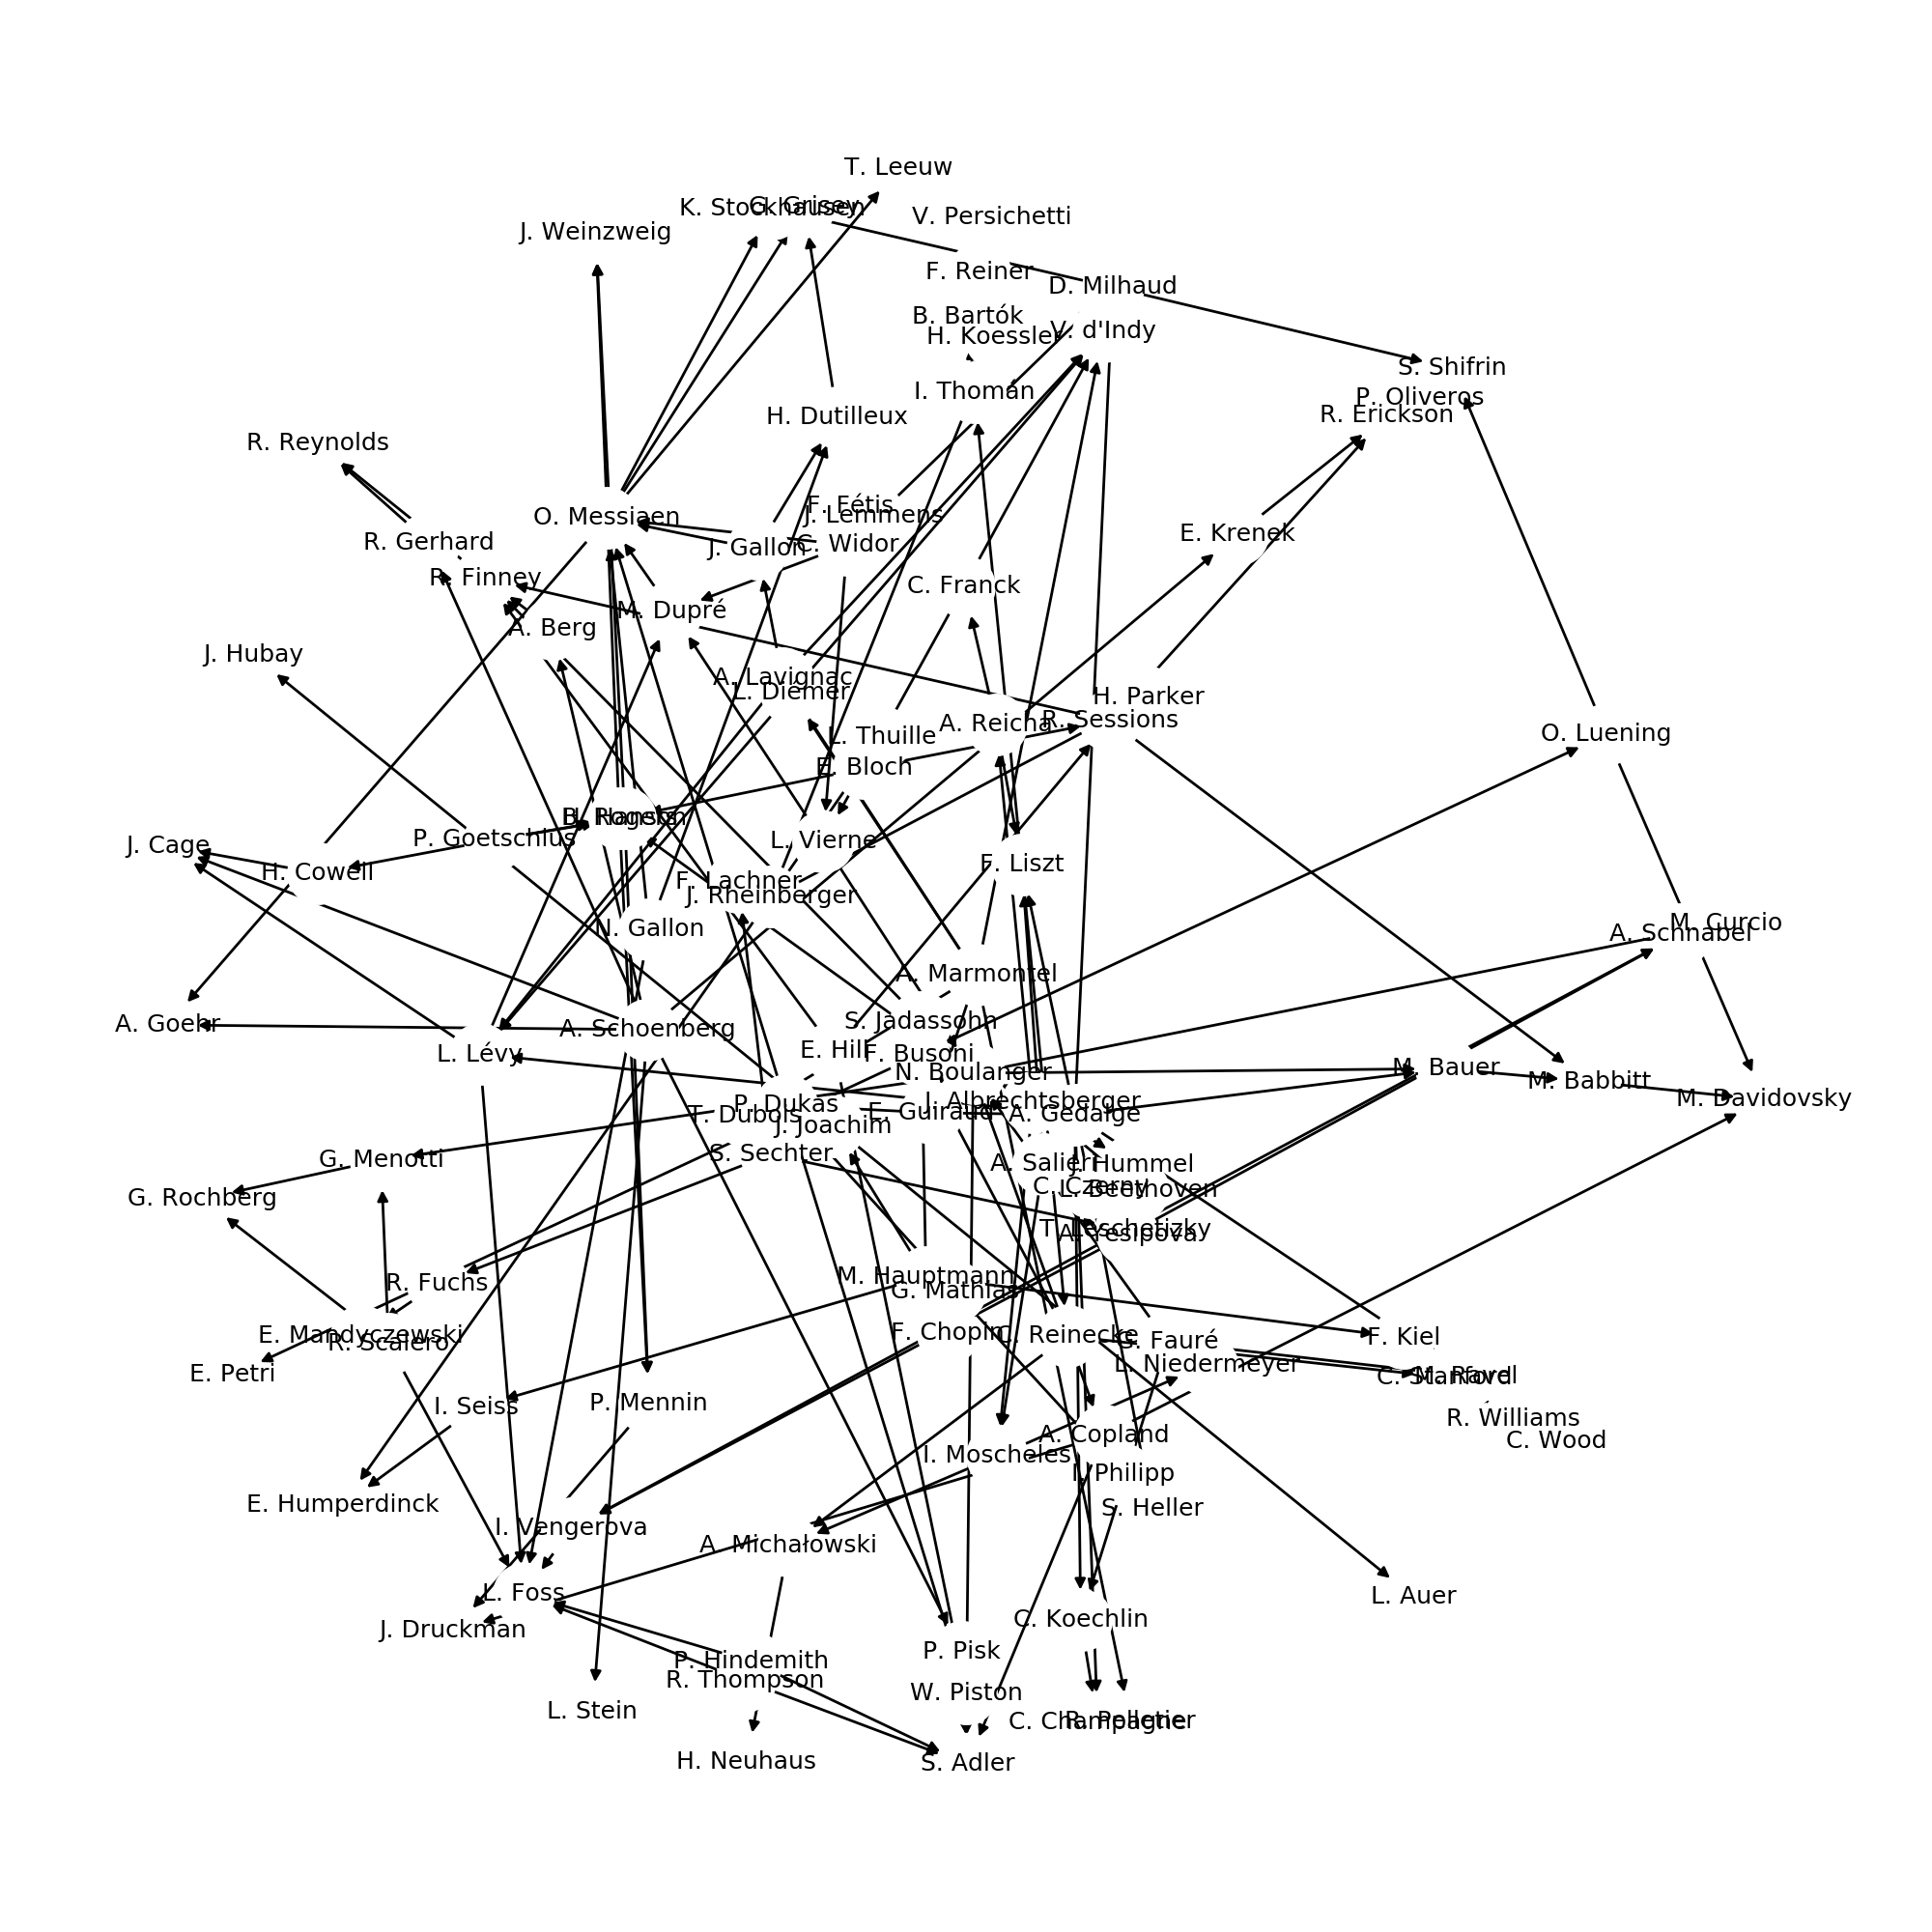

In [44]:
plt.figure(figsize=(10, 10))
nx.drawaw(connected_teacher_and_student_subgraph, with_labels=True, node_size=500, node_color='w', font_size=9, arrowsize=8)

## 9. In conclusion